In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import scipy
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# Reading the dataset to the python environment
data=pd.read_csv('Sales_data_zone_wise.csv')
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [3]:
 # Changing the column names
data.columns = ['Month', 'zone1', 'zone2', 'zone3', 'zone4']
data

,Month,zone1,zone2,zone3,zone4
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [4]:
# Checking for the null value
pd.isnull(data).sum()

Month    0
zone1    0
zone2    0
zone3    0
zone4    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   29 non-null     object
 1   zone1   29 non-null     int64 
 2   zone2   29 non-null     int64 
 3   zone3   29 non-null     int64 
 4   zone4   29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# The mean sales generated by each zone

In [6]:
# Calculating mean sales
data1 = data.mean()
data1

zone1    1.540493e+06
zone2    1.755560e+06
zone3    1.772871e+06
zone4    1.842927e+06
dtype: float64

Text(0, 0.5, 'Mean sales')

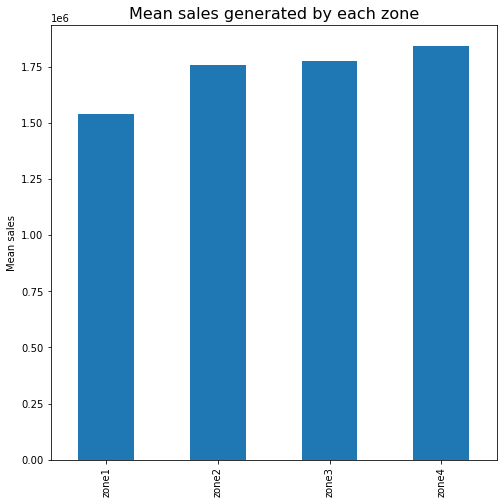

In [7]:
# Plotting bar graph
data1.plot(kind='bar', figsize=(8,8))
plt.title('Mean sales generated by each zone',fontsize=16)
plt.ylabel('Mean sales')

From the above bar graph we can conclude that zone1 has the lowest mean sales and zone4 has the highest mean sales.

# Total sales generated by all the zones for each month

In [8]:
# Calculating total sales
data2 = data.sum(axis=1)
data2

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

Text(0.5, 0, 'Month')

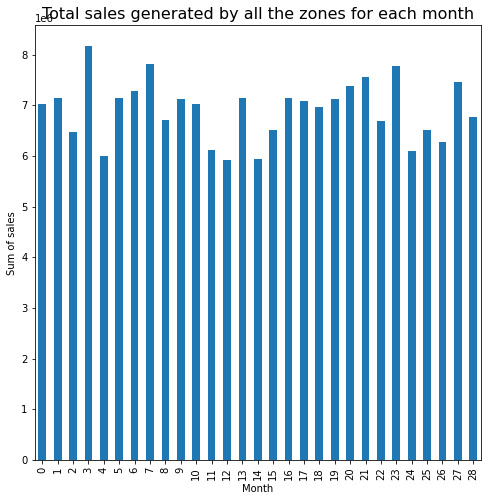

In [9]:
# Plotting bar graph
data2.plot(kind='bar', figsize=(8,8))
plt.title('Total sales generated by all the zones for each month',fontsize=16)
plt.ylabel('Sum of sales')
plt.xlabel('Month')

# Check whether all the zones generate the same amount of sales

- Null hypothesis: H0: Sales generated by all zones are same.
- Alternative hypothesis: H1: At least, one of the zone sale is different from other.

In [10]:
# One way ANOVA test
stats.f_oneway(data['zone1'], data['zone2'], data['zone3'], data['zone4'])


F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

### Conclusion

Here p-value is less than 0.1, thus we reject null hypothesis.

In [11]:
# ANOVA test using ols model
model = ols('zone1~zone1+zone2+zone3+zone4', data=data).fit()
anova = sm.stats.anova_lm(model, typ=1)
anova 

,df,sum_sq,mean_sq,F,PR(>F)
zone1,1.0,1.921153e+12,1.921153e+12,4.748946e+29,0.000000
zone2,1.0,6.546296e-20,6.546296e-20,1.618196e-02,0.899835
zone3,1.0,1.376688e-19,1.376688e-19,3.403071e-02,0.855191
zone4,1.0,1.572300e-21,1.572300e-21,3.886607e-04,0.984434
Residual,24.0,9.709030e-17,4.045429e-18,NaN,NaN


- From the above ANOVA table it is clear that the sales generated by all the zones are not the same.